In [6]:
#pip install altair vega_datasets

In [7]:
import altair as alt
import pandas as pd

In [8]:
alt.themes.enable('fivethirtyeight')

ThemeRegistry.enable('fivethirtyeight')

In [9]:
penguins_df = pd.read_csv('penguins_size.csv').dropna(subset=['sex'])
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [11]:
penguins_df[penguins_df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
peng_df = penguins_df[penguins_df['sex'].map(lambda x: str(x)!=".")]

In [13]:
peng_df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [14]:
alt.Chart(peng_df).mark_bar().encode(
    alt.X('count()'),
    alt.Y('species'),
    color = 'sex')

alt.Chart(...)

In [16]:
alt.Chart(peng_df).transform_density(
    'body_mass_g',
    groupby=['island'],
    as_=['body_mass_g', 'density'],
    steps=100
).mark_area(opacity=0.6).encode(
    alt.X('body_mass_g'),
    alt.Y('density:Q'),
    alt.Color('island'))

alt.Chart(...)

In [17]:
alt.Chart(peng_df).mark_bar().encode(
    alt.Y('count()'),
    alt.X('body_mass_g', bin = True),
    alt.Color('island')).properties(width = 200).facet('species')

alt.FacetChart(...)

In [18]:
alt.Chart(peng_df).mark_bar(opacity = 0.8).encode(
    alt.Y('count()', stack =None),
    alt.X('body_mass_g', bin = True),
    alt.Color('island')).properties(width = 200).facet('species')

alt.FacetChart(...)

In [19]:
penguin_facet = alt.Chart(peng_df).mark_bar().encode(
    x=alt.X('body_mass_g:Q'),
    y='count():Q',
    ).properties(title='Penguin mass', height=100, width=150
    ).facet(column='species', row='island')

penguin_facet

alt.FacetChart(...)

In [20]:
peng_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


A diagram made by Allison Horst which should help give you a bit of an idea of what these values are measuring

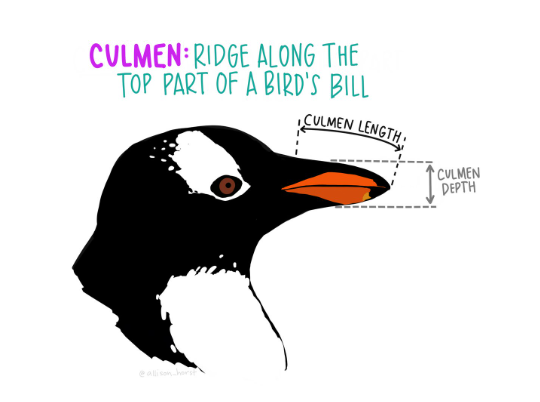

In [21]:
numeric_cols = peng_df.select_dtypes('number').columns.tolist()

alt.Chart(peng_df).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=30)),
    alt.Y('count()'),
    alt.Color('species')).repeat(numeric_cols, columns=2)

alt.RepeatChart(...)

In [22]:
alt.Chart(peng_df).mark_bar().encode(
    alt.X('culmen_depth_mm', bin= alt.Bin(maxbins=30)),
    alt.Y('count()'),
    color='species').properties(title = 'Culmen depth', width =230, height = 200)

alt.Chart(...)

In [23]:
alt.Chart(peng_df).mark_bar().encode(
    alt.X('culmen_depth_mm', bin=alt.Bin(maxbins=30)),
    alt.Y('count()', stack=False),
    color = 'species'
).properties(width=230, height =200  
).facet('sex')

alt.FacetChart(...)

For each species, the female enguins tend to have less deep culmen.

In [24]:
alt.Chart(peng_df).transform_density(
    'body_mass_g',
    groupby=['island'],
    as_=['body_mass_g', 'density'],
    steps=100
).mark_area(opacity=0.6).encode(
    alt.X('body_mass_g'),
    alt.Y('density:Q'),
    alt.Color('island'))

alt.Chart(...)

In [25]:
alt.Chart(peng_df).transform_density(
    'body_mass_g',
    groupby=['island','species'],
    as_=['body_mass_g', 'density'],
    steps=100
).mark_area(opacity=0.6).encode(
    alt.X('body_mass_g'),
    alt.Y('density:Q'),
    alt.Color('island')
).facet('species')

alt.FacetChart(...)

In [26]:
alt.Chart(peng_df).mark_boxplot().encode(
    alt.Y('species'),
    alt.X('body_mass_g')
    ).properties(height=200, width=400)


alt.Chart(...)

In [27]:
alt.Chart(peng_df).mark_rect().encode(
    alt.Y('body_mass_g', bin = alt.Bin(maxbins = 30)),
    alt.X('flipper_length_mm', bin = alt.Bin(maxbins = 30)),
    color='count()'
    ).properties(width = 250, height = 200)

alt.Chart(...)

positive linear relationship

In [28]:
peng_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [29]:
num_cols=peng_df.select_dtypes('number').columns.tolist()

In [30]:
cat_cols = peng_df.select_dtypes('object').columns.tolist()

alt.Chart(peng_df).mark_bar().encode(
    alt.X(alt.repeat(),type='quantitative', bin=alt.Bin(maxbins=30)),
    alt.Y('count()')
).properties(width=150,height=150).repeat(numeric_cols,columns=2)

alt.RepeatChart(...)

In [31]:
alt.Chart(peng_df).mark_circle().encode(
    alt.X(alt.repeat('column'), type='nominal'),
    alt.Y(alt.repeat('row'), type='nominal'),
    alt.Color('count()',title=None),
    alt.Size('count()', title=None)
).repeat(column=cat_cols, row=cat_cols).resolve_scale(color='independent',size='independent')

alt.RepeatChart(...)

In [32]:
plot_title = alt.TitleParams(
    "title",
    subtitle = "subtitle",
    fontSize=18, subtitleColor='firebrick')

base = alt.Chart(penguins_df, title= plot_title).mark_bar().encode(
    alt.X('count()'),
    alt.Y('species'))

In [33]:
text = alt.Chart(penguins_df).mark_text(align='left', dx=10).encode(
    alt.X('count()'),
    alt.Y('species'),
    alt.Text('count()'))

(text + base).configure_view(strokeWidth=0)

alt.LayerChart(...)

In [34]:
colour_plot = alt.Chart(penguins_df).mark_point(size=10).encode(
    alt.X('flipper_length_mm', 
          scale=alt.Scale(domain=[160, 240]), 
          title="Flipper length (mm)"),
    alt.Y('body_mass_g', 
          scale=alt.Scale(domain=[2500, 6500]), 
          title='Mass (grams)'),
    alt.Color('species', title='Penguin species', scale=alt.Scale(scheme='set1')),
    alt.Shape('species')
).properties(
    title='Gentoo penguins tend to have the longest flippers and weight the most among the penguin species.')

colour_plot

alt.Chart(...)

In [35]:
from vega_datasets import data


# Scroll to the bottom of this cell to layout the next 4 plots

# Loading in the data

# Density plot
mass_density_plot = alt.Chart(penguins_df).transform_density(
     'body_mass_g',
     groupby=['species'],
     as_=['body_mass_g', 'density'],
     steps=100
     ).mark_area(opacity=0.5).encode(
          alt.X('body_mass_g', title='Mass (grams)'),
          alt.Y('density:Q', title='Density'),
          alt.Color('species', title='Species', legend=alt.Legend(orient="right"))
          ).properties(width=400, height=100)

# Boxplot
mass_boxplot = alt.Chart(penguins_df).mark_boxplot(opacity=0.5).encode(
    alt.X('culmen_length_mm', title='Culmen length (mm)', scale=alt.Scale(zero=False)),
    alt.Y('species'),
    alt.Color('species', legend=None)
    ).properties( height=100, width=180)

# Heatmap
penguin_heatmap = alt.Chart(penguins_df).mark_rect().encode(
    alt.X('flipper_length_mm', bin=alt.Bin(maxbins=30), title='Flipper length (mm)'),
    alt.Y('body_mass_g', bin=alt.Bin(maxbins=30), title='Penguin mass (g)'),
    alt.Color('count()', title='Quantity', scale=alt.Scale(scheme='blues'))
    ).properties(width=150, height=100)

# Histograms   
culmen_facet_plot = alt.Chart(penguins_df.dropna(subset=['sex', 'species'])).mark_bar(opacity=0.5).encode(
    alt.X('culmen_depth_mm', bin=alt.Bin(maxbins=40), title= 'Culmen depth (mm)'),
    alt.Y('count()', stack=None, title='Number of penguins'),
    alt.Color('species', title = 'Species')
    ).properties(width=180, height=100
    ).facet('sex', title='').resolve_scale(y='independent')

# Titles for full visualization
titles = alt.TitleParams(
    "We've discovered many insights from the Penguins dataset",
     subtitle = ["We've learned that the Adelie and Chinstrap penguin",
                 " species are have similar culmen depth and body mass, however quite different culmen length"],
     fontSize=18, align='center', anchor='middle')


# Organize the plots above so it looks like the example provided above.
combined_plot = (mass_density_plot & (mass_boxplot | penguin_heatmap) & culmen_facet_plot
).properties(title=titles)

combined_plot

alt.VConcatChart(...)

In [36]:
brush = alt.selection_interval()

linked_scatter = (alt.Chart(penguins_df).mark_circle().encode(
    alt.X('body_mass_g', title='Body mass (g)', scale=alt.Scale(zero=False)),
    alt.Y('flipper_length_mm', title='Flipper length (mm)', scale=alt.Scale(zero=False)),
    color=alt.condition(brush, 'species', alt.value('lightgray')))
    .add_selection(brush))
    
together_plots = (linked_scatter &
                  linked_scatter.encode(alt.X('culmen_length_mm',
                                              title='Culmen length (mm)',
                                              scale=alt.Scale(zero=False)),
                                       alt.Y('culmen_depth_mm',
                                             title='Culmen depth (mm)',
                                             scale=alt.Scale(zero=False))))
together_plots

alt.VConcatChart(...)

In [37]:
click = alt.selection_multi(fields=['island'], bind='legend')

click_legend = (alt.Chart(penguins_df).mark_bar().encode(
    alt.X('count()', title='Number of Penguins'),
    alt.Y('island', title=None, sort='x'),
    alt.Color('island', title="Island"),
    alt.Row('species', title=None),
    opacity=alt.condition(click, alt.value(0.9), alt.value(0.2)))
.add_selection(click)).properties(width=300)

click_legend

alt.Chart(...)